In [1]:
# Path + imports

import sys
from pathlib import Path

here = Path.cwd().resolve()
project_root = None
for p in [here] + list(here.parents):
    if (p / "src").exists():
        project_root = p
        break
if project_root is None:
    raise FileNotFoundError("Could not find project root (folder containing 'src').")

sys.path.insert(0, str(project_root))

from src.db import list_tables, run_query
from src.eda import overview, clean_salaries


In [ ]:

from pathlib import Path

PROJECT_ROOT = Path(sys.path[0])   # this is your project root already
DB_PATH = PROJECT_ROOT / "data" / "database.sqlite"

print("DB_PATH:", DB_PATH)
print("Exists:", DB_PATH.exists())


DB_PATH: C:\Users\windows\Documents\Personal projects\sql-salaries-eda-sqlite\data\database.sqlite
Exists: True


In [ ]:
# Database connection (verified)
list_tables(str(DB_PATH))


,name
0,Salaries


In [ ]:
# Load data via SQL

df_raw = run_query("SELECT * FROM salaries;", str(DB_PATH))
df_raw.head()


,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0,400184.25,,567595.43,567595.43,2011,,San Francisco,
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,,538909.28,538909.28,2011,,San Francisco,
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.6,,335279.91,335279.91,2011,,San Francisco,
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916,56120.71,198306.9,,332343.61,332343.61,2011,,San Francisco,
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.6,9737,182234.59,,326373.19,326373.19,2011,,San Francisco,


In [7]:
# Clean data

df = clean_salaries(df_raw)
overview(df)


C:\Users\windows\Documents\Personal projects\sql-salaries-eda-sqlite\src\eda.py:18: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace("Not Provided", np.nan).dropna()


Shape: (111885, 13)

Head:
          Id        EmployeeName                      JobTitle    BasePay  \
36159  36160      Gary Altenberg  Lieutenant, Fire Suppression  128808.87   
36160  36161        Gregory Suhr               Chief of Police  302578.00   
36161  36162          Khoa Trinh   Electronic Maintenance Tech  111921.00   
36162  36163  Joanne Hayes-White        Chief, Fire Department  296943.01   
36163  36164   Frederick Binkley     EMT/Paramedic/Firefighter  126863.19   

       OvertimePay  OtherPay  Benefits   TotalPay  TotalPayBenefits  Year  \
36159    220909.48  13126.31  44430.12  362844.66         407274.78  2012   
36160         0.00  18974.11  69810.19  321552.11         391362.30  2012   
36161    146415.32  78057.41  53102.29  336393.73         389496.02  2012   
36162         0.00  17816.59  72047.88  314759.60         386807.48  2012   
36163    192424.49  17917.18  44438.25  337204.86         381643.11  2012   

      Notes         Agency Status  
36159      

In [8]:
# Exercise 1 — First 5 employee names

run_query(
    "SELECT EmployeeName FROM salaries LIMIT 5;",
    str(DB_PATH)
)


,EmployeeName
0,NATHANIEL FORD
1,GARY JIMENEZ
2,ALBERT PARDINI
3,CHRISTOPHER CHONG
4,PATRICK GARDNER


In [9]:
# Exercise 2 — Top 5 highest paid employees

run_query(
    """
    SELECT EmployeeName, TotalPay
    FROM salaries
    ORDER BY TotalPay DESC
    LIMIT 5;
    """,
    str(DB_PATH)
)


,EmployeeName,TotalPay
0,NATHANIEL FORD,567595.43
1,GARY JIMENEZ,538909.28
2,David Shinn,471952.64
3,Amy P Hart,390111.98
4,Gary Altenberg,362844.66


In [10]:
# Exercise 3 — Average BasePay

run_query(
    """
    SELECT ROUND(AVG(BasePay), 2) AS avg_basepay
    FROM salaries;
    """,
    str(DB_PATH)
)


,avg_basepay
0,66053.73


In [11]:
# Exercise 4 — Overtime > $20,000 in 2012

run_query(
    """
    SELECT EmployeeName, OvertimePay
    FROM salaries
    WHERE Year = 2012 AND OvertimePay > 20000
    ORDER BY OvertimePay DESC;
    """,
    str(DB_PATH)
)


,EmployeeName,OvertimePay
0,Gary Altenberg,220909.48
1,Frederick Binkley,192424.49
2,Scott Scholzen,160418.47
3,Khoa Trinh,146415.32
4,Alvin Lau,139260.09
...,...,...
2738,Duong Huynh,20012.54
2739,Roderick Dent,20005.51
2740,Santiago Lagandaon,20004.81
2741,Frederick Lumpkin,20002.29


In [12]:
# Exercise 5 — Zero overtime pay count


run_query(
    """
    SELECT COUNT(*) AS zero_overtime_count
    FROM salaries
    WHERE OvertimePay = 0;
    """,
    str(DB_PATH)
)


,zero_overtime_count
0,77321


In [13]:
# Create output folder
import os
os.makedirs("outputs/figures", exist_ok=True)


In [14]:
# Top 5 job titles

df["JobTitle"].value_counts().head(5)


JobTitle
Transit Operator                6975
Special Nurse                   4382
Registered Nurse                3725
Public Svc Aide-Public Works    2514
Police Officer 3                2411
Name: count, dtype: int64

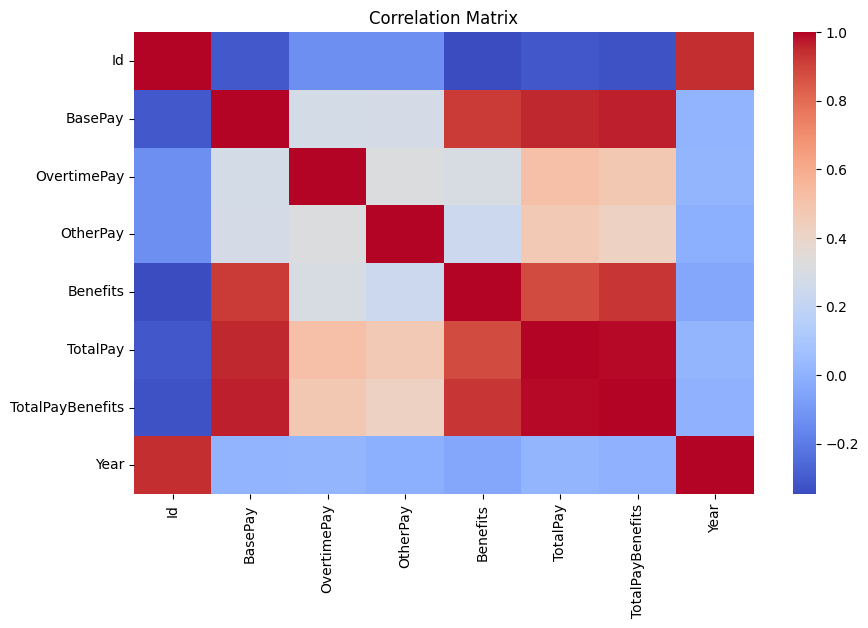

In [15]:
# Correlation heatmap

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), cmap="coolwarm")
plt.title("Correlation Matrix")
plt.savefig("outputs/figures/correlation_heatmap.png", dpi=300)
plt.show()


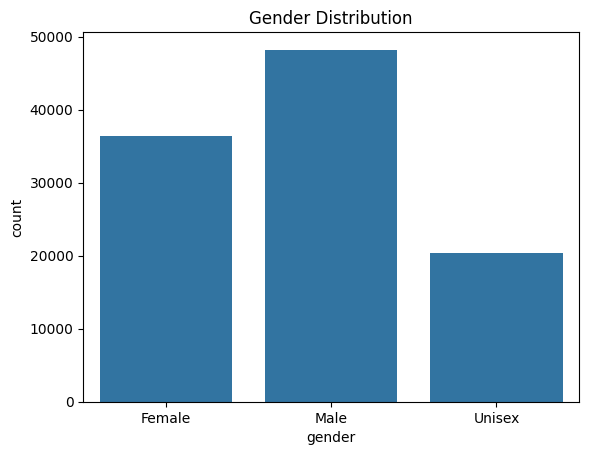

In [17]:
# Gender Analysis (final part)
import pandas as pd

gender_df = pd.read_csv(PROJECT_ROOT / "data" / "gender.csv")

df["name"] = df["EmployeeName"].apply(lambda x: x.split()[0].upper())
final_df = gender_df.merge(df, on="name", how="inner")

sns.countplot(data=final_df, x="gender")
plt.title("Gender Distribution")
plt.show()


In [18]:
# Converting object columns to numeric

num_cols = ["BasePay", "OvertimePay", "OtherPay", "Benefits"]

for col in num_cols:
    df[col] = pd.to_numeric(df[col], errors="coerce")

df[num_cols].dtypes


BasePay        float64
OvertimePay    float64
OtherPay       float64
Benefits       float64
dtype: object

In [21]:
# Median value for each job type

df.groupby("JobTitle")["TotalPay"].median().sort_values(ascending=False).head(10)


JobTitle
Chief Investment Officer        339653.700
Chief of Police                 326716.760
Chief, Fire Department          326233.440
Gen Mgr, Public Trnsp Dept      294000.180
Dep Chf of Dept (Fire Dept)     287489.840
Mayor                           281537.170
Asst Chf of Dept (Fire Dept)    280219.140
Dep Dir for Investments, Ret    278592.545
Deputy Chief 3                  274824.090
Executive Contract Employee     273776.240
Name: TotalPay, dtype: float64

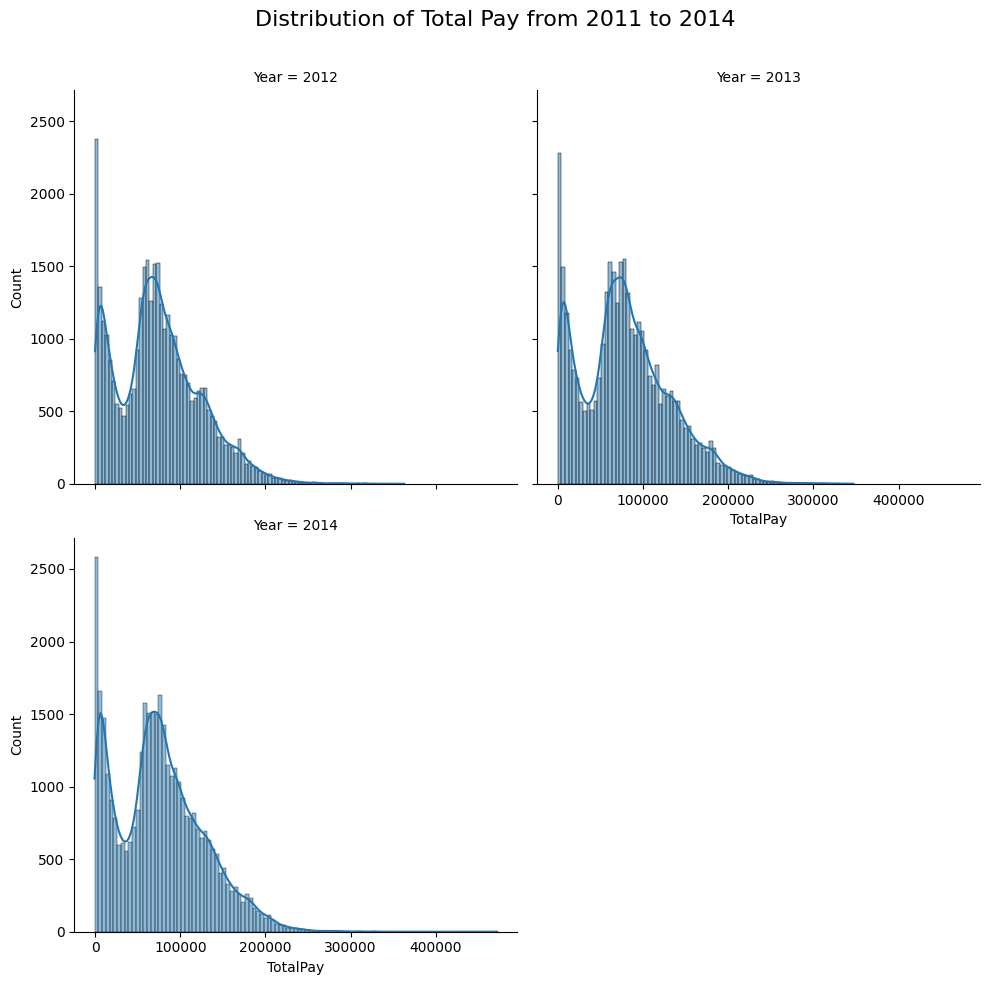

In [22]:
# Distribution of TotalPay from 2011 to 2014

g = sns.FacetGrid(df, col="Year", col_wrap=2, height=5)
g.map(sns.histplot, "TotalPay", kde=True)
g.fig.suptitle("Distribution of Total Pay from 2011 to 2014", fontsize=16)
g.fig.subplots_adjust(top=0.9)


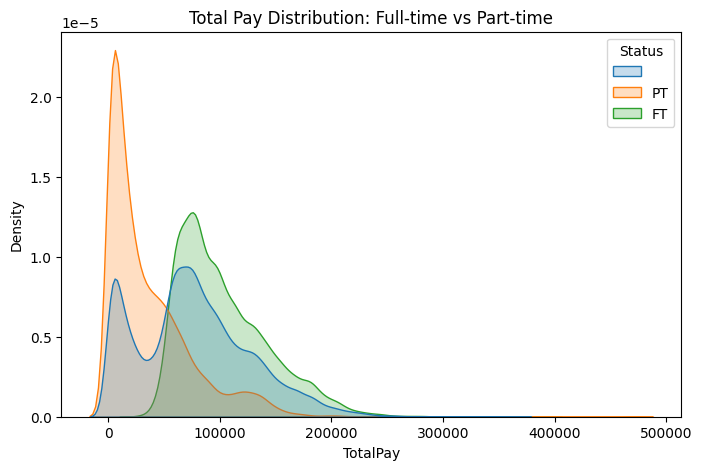

In [23]:
# TotalPay: Full-time vs Part-time (KDE plot)

plt.figure(figsize=(8,5))
sns.kdeplot(
    data=df, x="TotalPay", hue="Status",
    common_norm=False, fill=True
)
plt.title("Total Pay Distribution: Full-time vs Part-time")
plt.show()


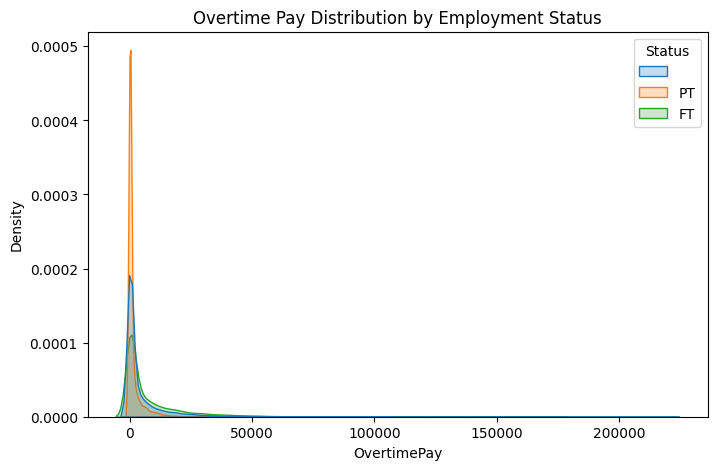

In [24]:
# OvertimePay: Full-time vs Part-time

plt.figure(figsize=(8,5))
sns.kdeplot(
    data=df, x="OvertimePay", hue="Status",
    common_norm=False, fill=True
)
plt.title("Overtime Pay Distribution by Employment Status")
plt.show()


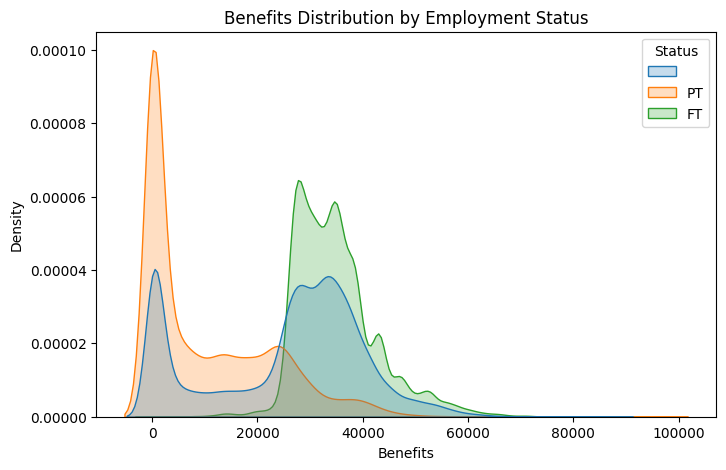

In [25]:
# Benefits: Full-time vs Part-time


plt.figure(figsize=(8,5))
sns.kdeplot(
    data=df, x="Benefits", hue="Status",
    common_norm=False, fill=True
)
plt.title("Benefits Distribution by Employment Status")
plt.show()


In [26]:
# Gender data (local file)

gender_data = pd.read_csv(PROJECT_ROOT / "data" / "gender.csv")
gender_data.head()


,id,name,gender
0,4,A YING,Unisex
1,16,AA,Female
2,28,AABAN,Male
3,40,AABHA,Unisex
4,52,AABHEER,Male


In [27]:
# Extract first name + merge gender

df["name"] = df["EmployeeName"].apply(lambda x: x.split()[0].upper())
final_df = pd.merge(gender_data, df, how="inner", on="name")
final_df.head()


,id,name,gender,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1492,AALIYAH,Female,71328,Aaliyah Hogue,Public Svc Aide-Public Works,2493.61,0.00,0.00,212.71,2493.61,2706.32,2012,,San Francisco,
1,1492,AALIYAH,Female,100915,Aaliyah V Hogue,Junior Clerk,33271.68,0.00,0.00,17859.80,33271.68,51131.48,2013,,San Francisco,
2,1492,AALIYAH,Female,141683,Aaliyah V Hogue,Junior Clerk,12451.74,0.00,991.99,7627.47,13443.73,21071.20,2014,,San Francisco,PT
3,1492,AALIYAH,Female,146943,Aaliyah Javae'Mercedes O'Neal,Publ Svc Aide-Asst to Prof,2596.36,0.00,0.00,25.96,2596.36,2622.32,2014,,San Francisco,PT
4,2404,AARAN,Male,50915,Aaran Luo,Transit Operator,64947.24,12726.06,445.66,36539.64,78118.96,114658.60,2012,,San Francisco,


In [30]:
# Remove unisex gender

final_df = final_df[final_df["gender"] != "unisex"]
final_df["gender"].value_counts()


gender
Male      48216
Female    36343
Unisex    20373
Name: count, dtype: int64

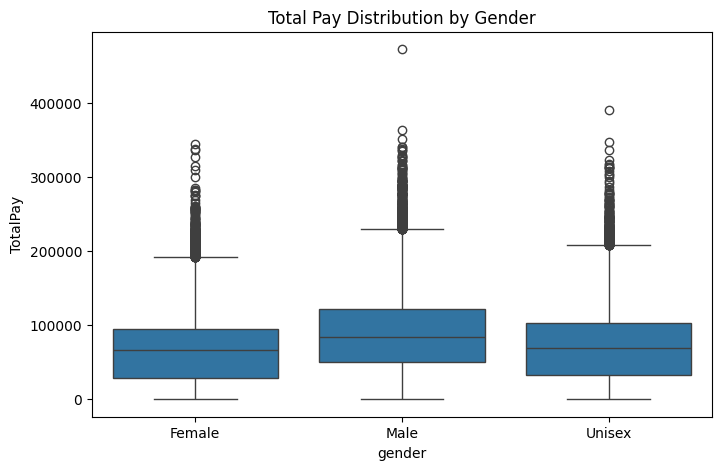

In [31]:
# TotalPay by gender (boxplot)

plt.figure(figsize=(8,5))
sns.boxplot(data=final_df, x="gender", y="TotalPay")
plt.title("Total Pay Distribution by Gender")
plt.show()


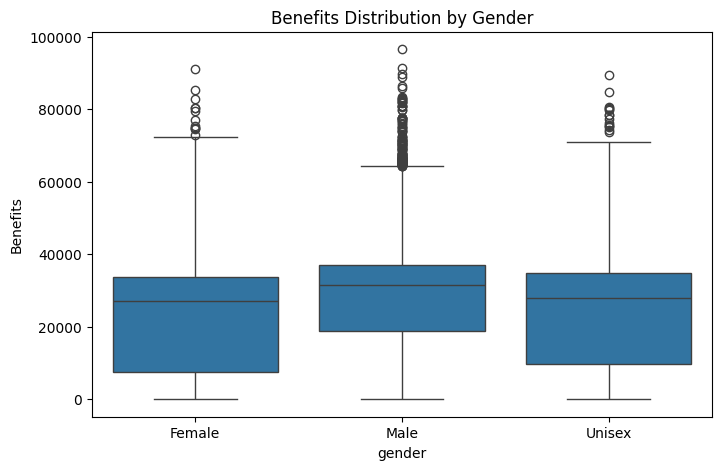

In [32]:
# Benefits by gender

plt.figure(figsize=(8,5))
sns.boxplot(data=final_df, x="gender", y="Benefits")
plt.title("Benefits Distribution by Gender")
plt.show()


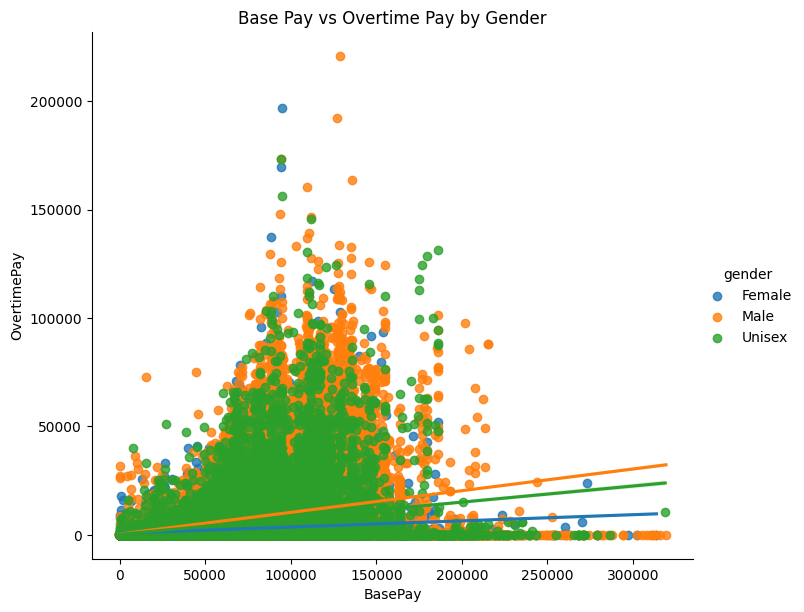

In [33]:
# BasePay vs OvertimePay by gender (lmplot)

sns.lmplot(
    data=final_df,
    x="BasePay",
    y="OvertimePay",
    hue="gender",
    height=6,
    aspect=1.2
)
plt.title("Base Pay vs Overtime Pay by Gender")
plt.show()
